**Plot SH RTM Results**

**Daniel Köhn 
Kiel, 02/04/2016**

**Import necessary packages**

In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.colors import LightSource, Normalize
from matplotlib.pyplot import gca
from pylab import rcParams
from matplotlib import rc
import pickle
import scipy.ndimage.filters
from scipy.ndimage.filters import gaussian_filter
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

**Activate different Post-Processing Options**

In [15]:
GAUSSIAN=1;

**Import Colormap**

In [16]:
fp = open('cmap_cm.pkl', 'rb')
my_cmap_cm = pickle.load(fp)
fp.close()

**FD grid dimensions**

In [17]:
DH = 0.05;
NX = 512;
NY = 256;
vpmin=800.0

**Define fonts**

In [18]:
FSize = 20
font = {'color':  'black',
        'weight': 'bold',
        'size': FSize}
mpl.rc('xtick', labelsize=FSize) 
mpl.rc('ytick', labelsize=FSize) 
rcParams['figure.figsize'] = 12, 11

**Read S-wave velocity model and RTM result**

In [19]:
f = open ('../inv_result_new_2016_profile_1/Single_vel_corr/PCG_04_12_2016_vs_rho_Qs_15/modelTest_vs_stage_4.bin')
data_type = np.dtype ('float32').newbyteorder ('<')
vp = np.fromfile (f, dtype=data_type)
vp = vp.reshape(NX,NY)
vp = np.transpose(vp)
vp = np.flipud(vp)

In [20]:
f1 = open ('SH_image_profile_1/07_12_2016_FWI_smooth_70_100_Hz/RTM_profile_1_FWI_smooth.bin')
RTM = np.fromfile (f1, dtype=data_type)
RTM = RTM.reshape(NX,NY)
RTM = np.transpose(RTM)
RTM = np.flipud(RTM)
RTM = scipy.ndimage.filters.laplace(RTM) # suppress low-wavenumber artifacts in image 

**Gaussian filter**

In [21]:
if(GAUSSIAN==1):
    RTM = gaussian_filter(RTM, sigma=[1,10])

Define Axis

In [22]:
x = np.arange(0.0, DH*NX, DH)
y = np.arange(0.0, DH*NY, DH)

**Scale RTM result with depth**

In [23]:
RTM_scale = np.zeros((NX,NY))
RTM_scale += np.flipud(y)**0
RTM*=RTM_scale.transpose()

**Plot SubPlots**

In [24]:
#plt.close('all')
#plt.figure()
#do_plot(1, 'inferno', "Inferno")
#do_plot(2, 'viridis', "Viridis")
#do_plot(3, my_cmap_cm, "My cool Colormap")
#plt.savefig('test.png', format='png', dpi=100)
#plt.savefig('test.pdf', format='pdf')
#plt.show()

In [25]:
def do_plot(n, an, title):
    ax=plt.subplot(2, 1, n)
    extent = [DH,NX*DH,DH,NY*DH]

    cmax=1e-4
    cmin=-cmax

    plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
    plt.rc('text', usetex=True)

    im1 = plt.imshow(RTM, cmap=plt.cm.gray, interpolation='none',
                 extent=extent, vmin=cmin, vmax=cmax)
    plt.hold(True)

    if(n==2):
        im2 = plt.imshow(vp, cmap=plt.cm.jet, alpha=.7, interpolation='bicubic',
              extent=extent)

    a = gca()
    a.set_xticklabels(a.get_xticks(), font)
    a.set_yticklabels(a.get_yticks(), font)
    a.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))
    a.yaxis.set_major_formatter(FormatStrFormatter('%0.0f'))
    #plt.axis('scaled')
    plt.title(title, fontdict=font)
    plt.ylabel('Depth [m]', fontdict=font)
    if(n==2):
        plt.xlabel('Distance [m]', fontdict=font)
    plt.gca().invert_yaxis()
    #cbar=plt.colorbar()
    #cbar.set_label('Vp[m/s]', fontdict=font, labelpad=1)

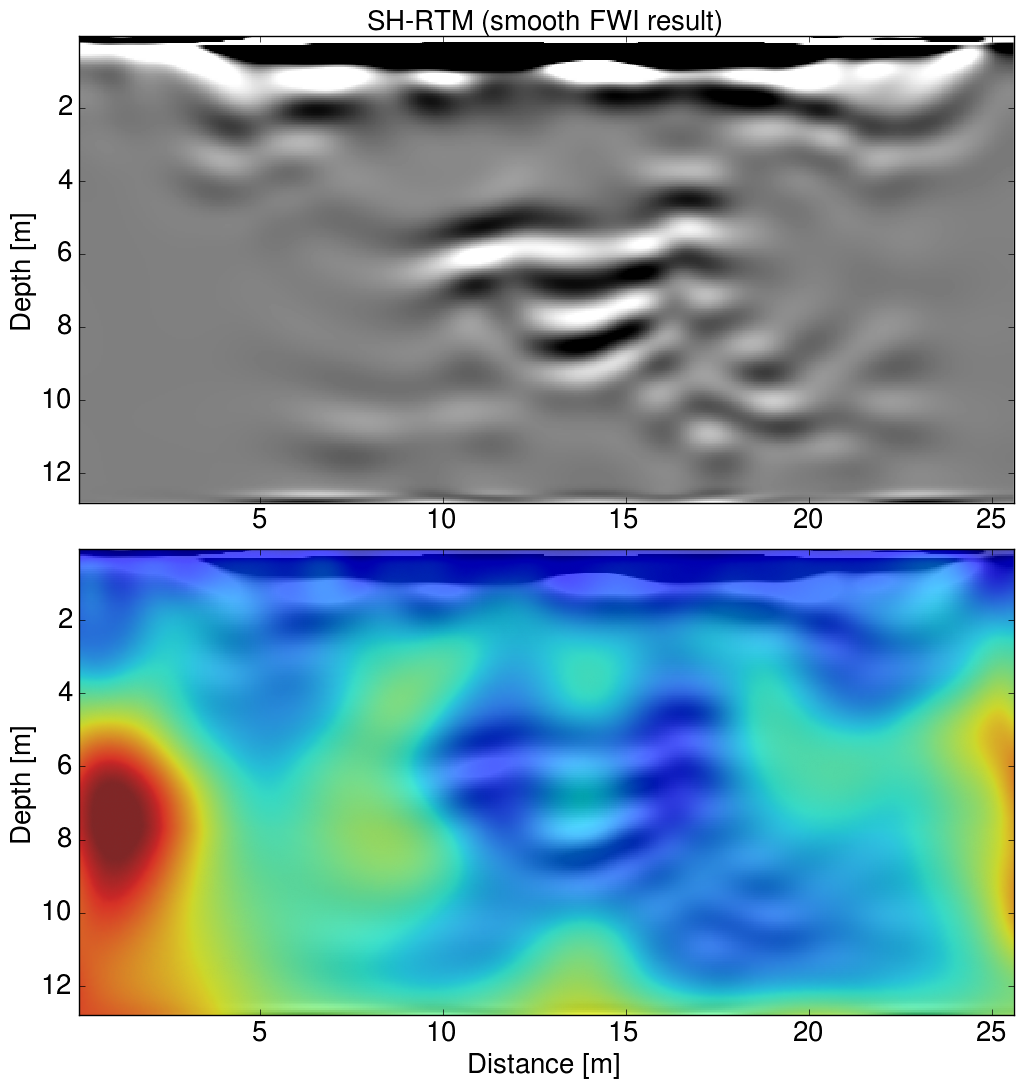

In [26]:
plt.close('all')
plt.figure()
do_plot(1, '(a)', r"SH-RTM (smooth FWI result)")
do_plot(2, '(b)', r" ")
#plt.savefig('test.png', format='png', dpi=100)
plt.savefig('test.pdf', bbox_inches='tight', format='pdf')
plt.tight_layout()
plt.show()